# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**: Beatriz Rogers Tripoli Barbosa

**RA**: 792170 

**Nome**: Laura Naomi Seto

**RA**: 813210


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

##### Análise dos atributos

* **Id**: Identificação do registro.

* **Peso**: Peso corporal do paciente [kg]
    * valores faltantes
    * tratamento por média
    * REMOVIDA:

* **Altura**: Altura do paciente [cm]
    * valores fora do intervalo aceitável (0 é válido?)
    * tratamento por média
    * REMOVIDA:

* **Índice de Massa Corporal** (IMC): $$\frac{Peso}{Altura^2}$$    
    * valores fora do intervalo válido
    * valores faltantes acarretados por: peso ou altura não registrados ou igual a 0
    * tratamento por média

* **Atendimento**: Data de atendimento [DD/MM/AA]
    * valores inválidos
    * tratamento por substituição por valor padrão (ou marca como inválido)
    * REMOVIDA:

* **Data de Nascimento** (DN): Data de nascimento [DD/MM/AA]
    * valores faltantes
    * valores inválidos
    * tratamento por substituição por valor padrão (ou marca como inválido)
    * REMOVIDA:

* **Idade**: Idade no momento do atendimento [anos]
    * valores não numéricos ('#VALUE!') acarretados por: atendimento e/ou data de nascimento inválidos 
    * valores fora do intervalo aceitável (idades negativas e pacientes não pediátricos)
    * valores faltantes acarretados por: data de nascimento não registrado
    * valores aparentemente válidos mas atendimento e/ou data de nascimento inválidos
    * tratamento por média

* **Convênio**: Tipo de plano de saúde utilizado para o atendimento
    * REMOVIDA:

* **Pulsos**: Avaliação da presença e qualidade dos pulsos arteriais [normais, outro, amplos, femorais diminuidos, diminuídos]
    * adotar formas canônicas para os valores possíveis
    * tratamneto por moda baseado na classe
    * conversão simbólico-numérico com **label encoding (ordinal) ou hot-one encoding (nominal)**

* **PA Sistólica**: Valor mais alto registrado durante o batimento cardíaco [mmHg]
    * valores fora fora do intervalo aceitável
    * valores faltantes
    * tratamento por média

* **PA Diastólica**: Valor mais baixo registrado entre os batimentos cardíacos [mmHg]
    * valores fora do intervalo aceitável
    * valores faltantes 
    * tratamento por média

* **Pressão de Pulso Arterial** (PPA): [normal, pre-hipertensão pas, pre-hipertensão pad, has-1 pas, has-1 pad, has-2 pas, has-2 pad]
    * valor inválido ('#VALUE!')
    * tratamento por moda
    * conversão simbólico-numérico com label encoding (ordinal)

* **B2**: Segundo som cardíaco [normal, desdob fixo, outro, hiperfonética, única]
    * tratamento por moda
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Sopro**: Sopro cardíaco [ausente, sistólico, diastólico, contínuo, 'sistolico e diastólico']
    * adotar formas canônicas para os valores possíveis 
    * tratamento por moda
    * conversão simbólico-numérico com label encoding (ordinal): progressão de anormalidade e gravidade

* **Frequência Cardíaca** (FC): Número de batimentos cardíacos por minuto [bpm]
    * valores faltantes
    * valores fora do intervalo aceitável
    * adotar forma canônica para os valores (ex: 123 ou 100-130)
        * valores não numéricos transformados em NaN
    * tratamento por média

* **História da Doença Atual 1** (HDA 1): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **História da Doença Atual 2** (HDA2): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente
    * REMOVIDA: 96% dos registros tinham este campo não preenchido

* **Sexo**: Gênero biológico do paciente [masculino, feminino e indeterminado]
    * adotar formas canônicas para os valores possíveis
    * tratamento por moda
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Motivo 1**: Principal motivo para o atendimento ['6 - Suspeita de cardiopatia', '2 - Check-up', '5 - Parecer cardiológico', '1 - Cardiopatia já estabelecida', nan, '7 - Outro']
    * valores faltantes
    * tratamento por substituição por valor padrão
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Motivo 2**: Motivo secundário para o atendimento ['6 - Palpitação/taquicardia/arritmia', '6 - Dispnéia', nan, '5 - Atividade física', '5 - Cirurgia', '6 - Sopro', '1 - Cardiopatia adquirida', '1 - Cardiopatia congenica', '6 - Dor precordial', '6 - HAS/dislipidemia/obesidade', '6 - Cianose', 'Outro', '6 - Alterações de pulso/perfusão', '6 - Cardiopatia na familia', '6 - Cansaço', '5 - Uso de cisaprida', '6 - Cianose e dispnéia']
    * valores faltantes
    * tratamento por substituição por valor padrão
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Classe**: [normal, anormal]
    * adotar formas canônicas para os valores possíveis

In [284]:
# biblioteca usada para trabalhar com vetores e matrizes
import numpy as np 

# biblioteca usada para trabalhar com dataframes e análise de dados
import pandas as pd

# bibliotecas usadas para geração de graficos
import seaborn as sns
import matplotlib.pyplot as plt


from scripts.analise_exploratoria import *
from scripts.preprocessamento import *

print('Bibliotecas carregadas com sucesso')

Bibliotecas carregadas com sucesso


In [285]:
# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'data/RHP_data.csv', sep=',', index_col=None) 
df_train_id = pd.read_csv('data/train.csv', sep=',', index_col=None)

print('Dados importados com sucesso!')


Dados importados com sucesso!



#### Exploração dos dados com estatística descritiva

Resumo quantitativo das principais características de um conjunto de dados:
* Frequência
* Localização ou tendência central
* Dispersão ou espalhamento
* Distribuição ou formato

Os três últimos são utilizados geralmente para valores numéricos.

Para dados univariados: 
* Medidas de localidade: moda, média, mediana, média truncada, quartis, percentil (boxplot)
* Medidas de espalhamento: intervalo, variância e descio padrão
* Medidas de distribuição: obliquidade ou assimetria e curtose (histograma e gráfico pizza)

Para dados multivariados:
* Medidas de localidade: calculado para cada atributo separadamente
* Medidas de espalhamento: calculado apra cada atributo separadamente + covariância e correlação (matriz de covariância ou correlação)

In [286]:
print("Registros de treino fornecidos: ", df_train_id.shape)

# recuperar as partições de treino por Id e concatenar o coluna alvo CLASSE
df_train = pd.merge(df_dataset, df_train_id, on='Id')


# remover os registros de treino que não possuem atributo alvo classificado
df_train = df_train.dropna(subset=['CLASSE'], axis=0).reset_index(drop=True)
print("Registros de treino classificados: ", df_train.shape)

Registros de treino fornecidos:  (14727, 2)
Registros de treino classificados:  (13559, 21)


In [287]:
# ANÁLISE DE VALORES FALTANTES

analise_valores_faltantes(df_train)

display(df_train)


Relação de atributos e porcentagem de nulos: 


,qtd,%
Id,0.0,0.000000
Peso,252.0,1.858544
Altura,0.0,0.000000
IMC,3178.0,23.438307
Atendimento,225.0,1.659414
DN,604.0,4.454606
IDADE,604.0,4.454606
Convenio,3711.0,27.369275
PULSOS,46.0,0.339258
PA SISTOLICA,5339.0,39.376060


,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,...,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,2,3.5,50,14.0,25/05/05,19/05/05,0.02,GS,Normais,NaN,...,Não Calculado,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia,Anormal
1,3,0.0,0,NaN,12/06/01,08/05/05,-4.05,SULA,Normais,NaN,...,Não Calculado,Normal,Sistólico,88,Assintomático,NaN,M,2 - Check-up,NaN,Anormal
2,4,8.1,65,19.0,15/10/09,21/04/09,0.5,NaN,Normais,NaN,...,Não Calculado,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN,Anormal
3,6,26.0,112,21.0,22/08/03,26/05/99,4.4,GS,Normais,100.0,...,Normal,Desdob fixo,ausente,100,Assintomático,NaN,M,2 - Check-up,NaN,Anormal
4,7,40.0,151,18.0,14/01/08,14/08/95,12.89,SAME,Normais,NaN,...,Não Calculado,Normal,ausente,96,Dor precordial,NaN,M,5 - Parecer cardiológico,NaN,Anormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13554,17868,10.6,85,15.0,28/12/06,06/12/04,2.14,NaN,Normais,90.0,...,Não Calculado,Normal,ausente,100,Assintomático,NaN,Masculino,5 - Parecer cardiológico,5 - Cirurgia,Normal
13555,17869,9.5,76,16.0,03/02/06,06/12/04,1.2,NaN,Normais,NaN,...,Não Calculado,Normal,ausente,92,Assintomático,NaN,Masculino,5 - Parecer cardiológico,5 - Cirurgia,Normal
13556,17871,65.0,175,21.0,03/08/07,16/02/84,24.34,Medial,Normais,126.0,...,Não Calculado,Normal,ausente,76,Dor precordial,NaN,Feminino,1 - Cardiopatia já estabelecida,1 - Cardiopatia congenica,Normal
13557,17872,27.0,134,15.0,04/10/04,03/12/27,-24.03,GS,Normais,90.0,...,Não Calculado,Normal,Sistólico,NaN,NaN,NaN,Feminino,6 - Suspeita de cardiopatia,6 - Dor precordial,Normal


---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

##### Abordagens
**Valores faltantes e inválidos** - analisar porcentagem de valores faltantes e natureza dos dados (numérico, categórico, temporais)
- exclusão de linha (poucos faltantes)
- exclusão de coluna (muitos faltantes)
- substituição por média, mediana (melhor quando há outliers) ou moda (dados categóricos)
- substituição por interpolação (adequada para séries temporais)

**Duplicatas** (todos os valores de atributos iguais e mesma classificação) 
- exclusão de linha

**Inconsistências** (todos os valores de atributos iguais e classificados diferentemente)
- exclusão das linhas

In [288]:
# EXCLUIR ATRIBUTOS CONSIDERADOS IRRELEVANTES

# df_train = df_train.drop(columns=['Peso', 'Altura', 'Atendimento', 'DN', 'Convenio', 'HDA2'], axis=1)


In [289]:
# IDENTIFICAR VALORES FALTANTES E INVÁLIDOS

# col_numerica = ['Id', 'IMC', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC']    
col_numerica = ['IMC', 'Peso', 'Altura', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC']   
col_categorica = ['PULSOS', 'PPA', 'B2', 'SOPRO', 'HDA 1', 'SEXO', 'MOTIVO1', 'MOTIVO2']
col_temporais = ['Atendimento', 'DN']

# ATRIBUTOS NUMÉRICOS
    # transformando não numéricos em NaN
df_train[col_numerica] = invalidar_nao_numerico(df_train, col_numerica)
df_train['IDADE'] = df_train['IDADE'].apply(lambda x: x if 0<=x else np.nan)
df_train['Peso'] = df_train['Peso'].apply(lambda x: x if 0<=x else np.nan)
df_train['Altura'] = df_train['Altura'].apply(lambda x: x if 0<=x else np.nan)


# ATRIBUTOS CATEGÓRICOS
    # transformando para forma canônica (lower case)
df_train[col_categorica] = padronizar_string(df_train, col_categorica)
       
        # PPA  
valores_validos = ['normal', 'pre-hipertensão pas', 'has-2 pas', 'pre-hipertensão pad', 'has-1 pas', 'has-2 pad', 'has-1 pad']
df_train['PPA'] = df_train['PPA'].apply(lambda x: x if x in valores_validos else np.nan)
       
        # SEXO
valores_validos_f = ['f', 'feminino']
valores_validos_m = ['m', 'masculino']
df_train['SEXO'] = df_train['SEXO'].apply(lambda x: 'f' if x in valores_validos_f else 'm' if x in valores_validos_m else np.nan)
       
        # CLASSE
valores_validos_0 = ['Normal', 'Normais']
valores_validos_1 = ['Anormal']
df_train['CLASSE'] = df_train['CLASSE'].apply(lambda x: 'normal' if x in valores_validos_0 else 'anormal' if x in valores_validos_1 else np.nan)


# ATRIBUTOS TEMPORAIS
df_train[col_temporais] = invalidar_nao_temporais(df_train, col_temporais)

In [290]:
print(df_train.columns)
df_aux = df_train[['Atendimento', 'DN', 'IDADE']].loc[df_train['IDADE'] > 18]
df_aux['idade calculada'] = df_aux['Atendimento'].dt.year - df_aux['DN'].dt.year
display(df_aux.loc[df_aux['idade calculada'] < 0])

Index(['Id', 'Peso', 'Altura', 'IMC', 'Atendimento', 'DN', 'IDADE', 'Convenio',
       'PULSOS', 'PA SISTOLICA', 'PA DIASTOLICA', 'PPA', 'B2', 'SOPRO', 'FC',
       'HDA 1', 'HDA2', 'SEXO', 'MOTIVO1', 'MOTIVO2', 'CLASSE'],
      dtype='object')


,Atendimento,DN,IDADE,idade calculada
2125,2007-12-07,2055-03-01,54.76,-48.0
6251,2006-10-25,2065-07-15,42.83,-59.0
7211,2004-06-21,2068-04-09,37.56,-64.0
8642,2006-01-31,2068-07-06,38.99,-62.0
9728,2008-06-18,2040-05-31,70.61,-32.0
12003,2009-06-09,2064-07-10,46.61,-55.0
12068,2004-07-05,2051-11-01,54.66,-47.0
12127,2008-03-19,2055-02-23,55.07,-47.0


In [291]:
# GERAR ESTATÍSTICA DO CONJUNTO ANTES DA REMOÇÃO DE OUTLIERS
display(df_train.describe(include='all'))

,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,...,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
count,13559.000000,13306.000000,13559.000000,10381.000000,12995,12686,12719.000000,9848,13513,8220.000000,...,5664,13529,13538,12798.000000,10075,534,12972,13262,10306,13559
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400,5,NaN,...,7,5,5,NaN,8,8,2,5,16,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GS,normais,NaN,...,normal,normal,ausente,NaN,assintomático,Palpitacao,m,5 - parecer cardiológico,5 - cirurgia,normal
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2126,13375,NaN,...,4917,12930,8708,NaN,7486,126,7572,6322,3336,8138
mean,8956.136219,22.103029,87.304373,17.791735,2007-03-05 00:51:44.948057088,2001-02-11 15:48:50.285353856,6.408486,NaN,NaN,101.392336,...,NaN,NaN,NaN,94.086732,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,0.000000,0.000000,0.000000,1990-01-03 00:00:00,1969-07-14 00:00:00,0.000000,NaN,NaN,10.000000,...,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,4467.500000,8.500000,50.000000,15.000000,2005-05-23 00:00:00,1997-06-09 06:00:00,2.260000,NaN,NaN,90.000000,...,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,8936.000000,18.500000,101.000000,17.000000,2007-06-20 00:00:00,2001-06-12 00:00:00,5.740000,NaN,NaN,100.000000,...,NaN,NaN,NaN,90.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,13435.500000,32.000000,132.000000,19.000000,2009-01-16 00:00:00,2005-02-10 18:00:00,10.040000,NaN,NaN,110.000000,...,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,17873.000000,127.000000,198.000000,848.000000,2066-08-22 00:00:00,2068-07-06 00:00:00,70.610000,NaN,NaN,990.000000,...,NaN,NaN,NaN,9288.000000,NaN,NaN,NaN,NaN,NaN,NaN


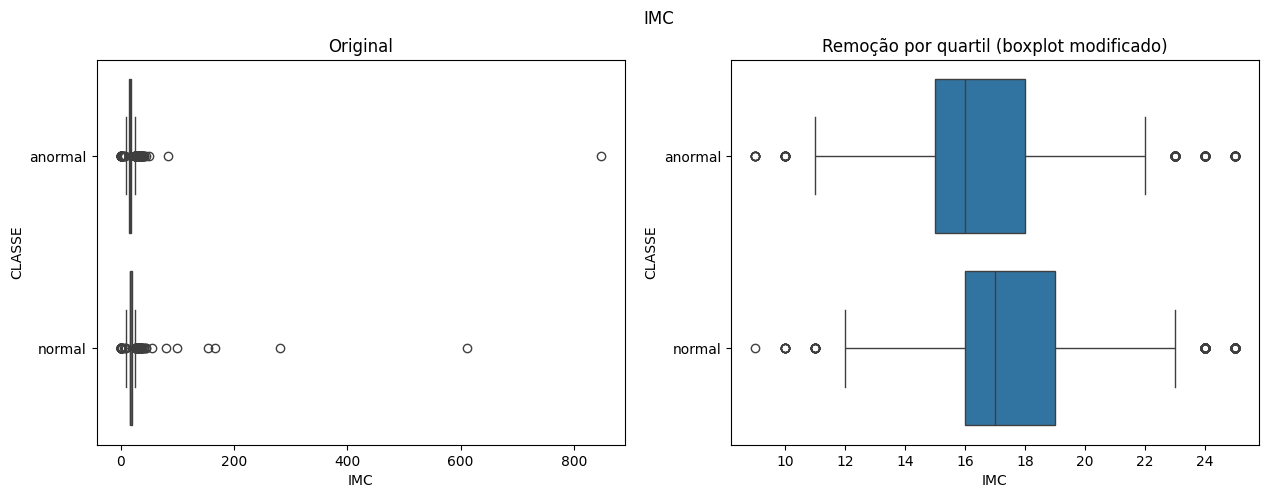

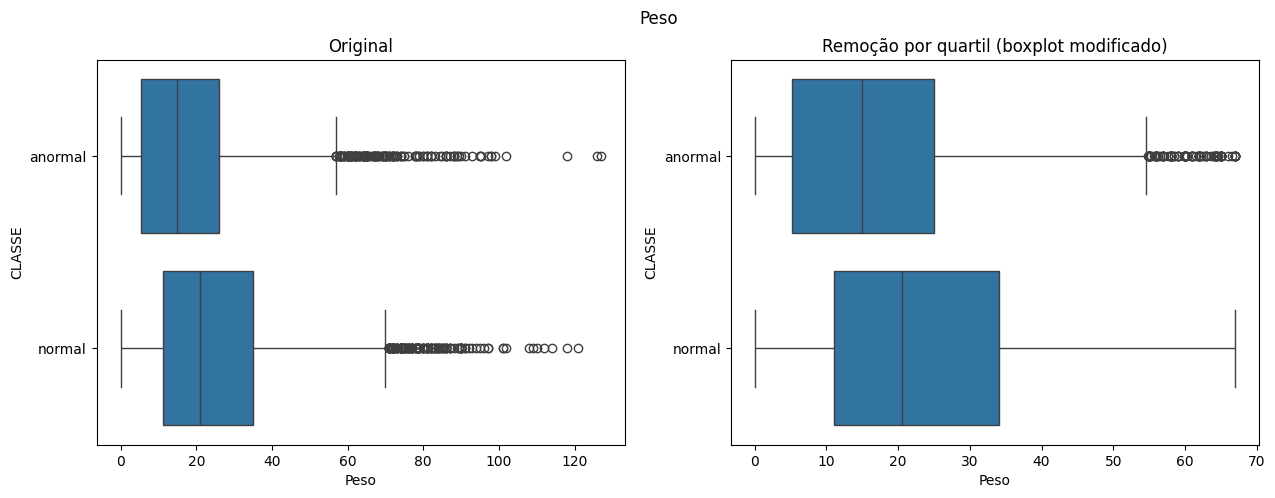

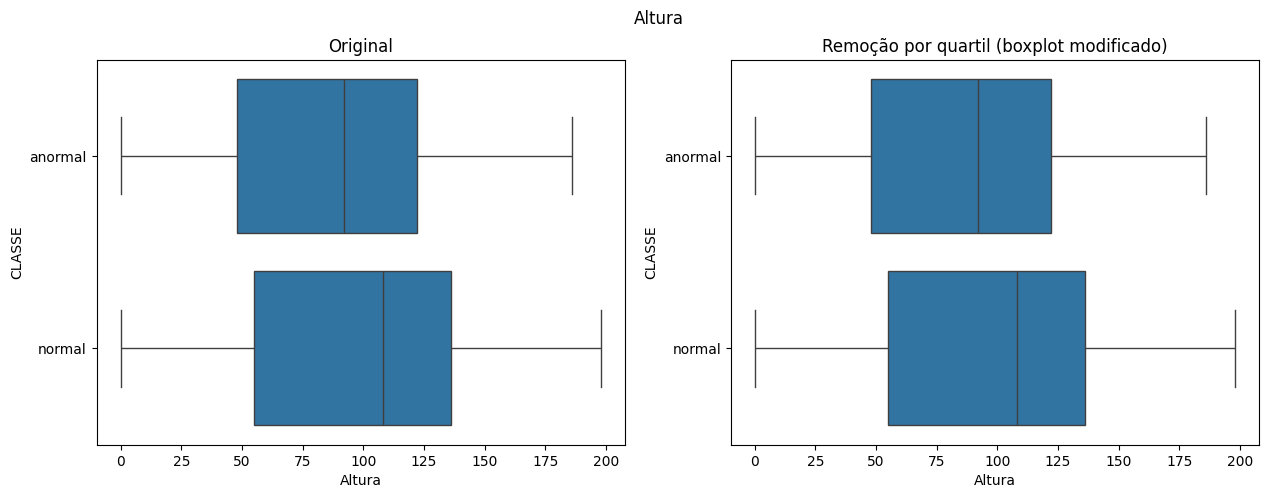

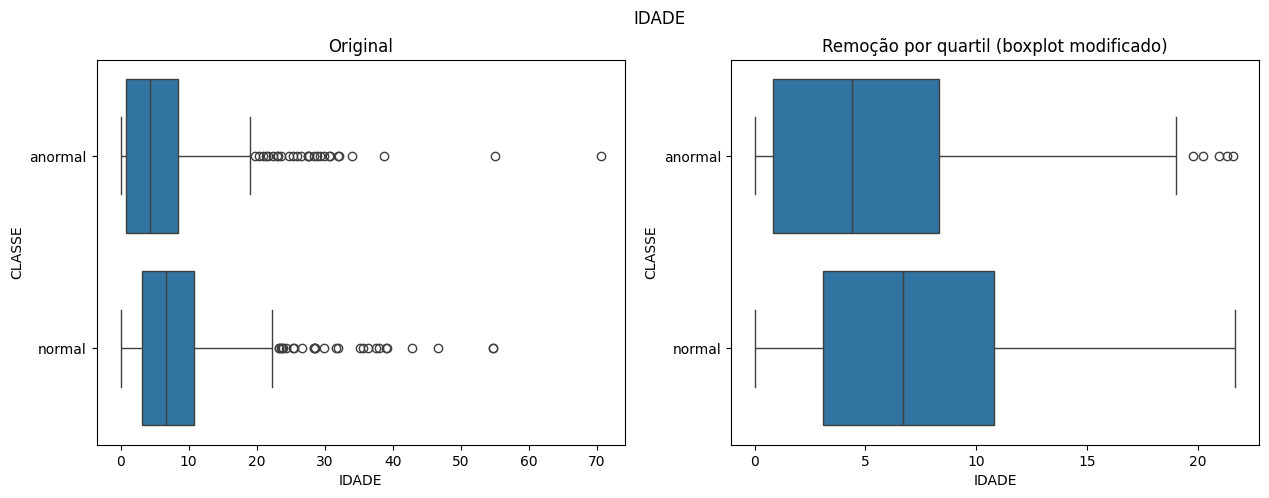

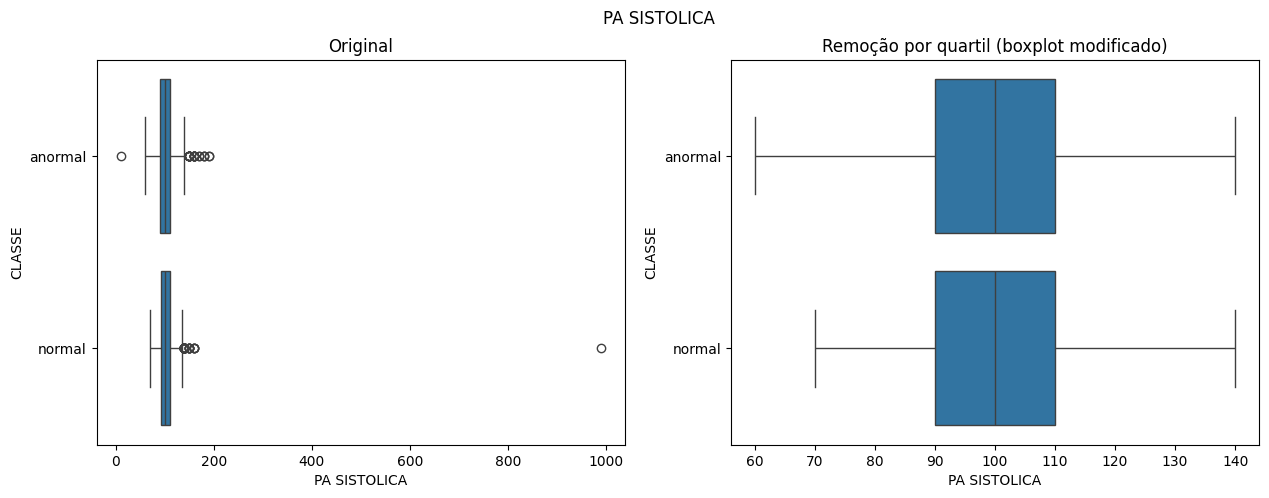

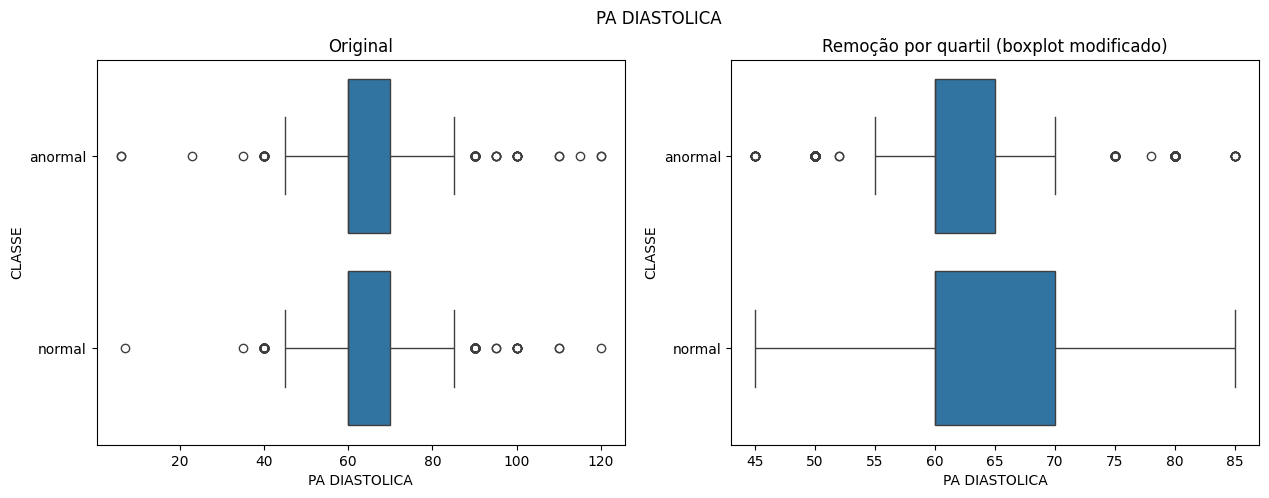

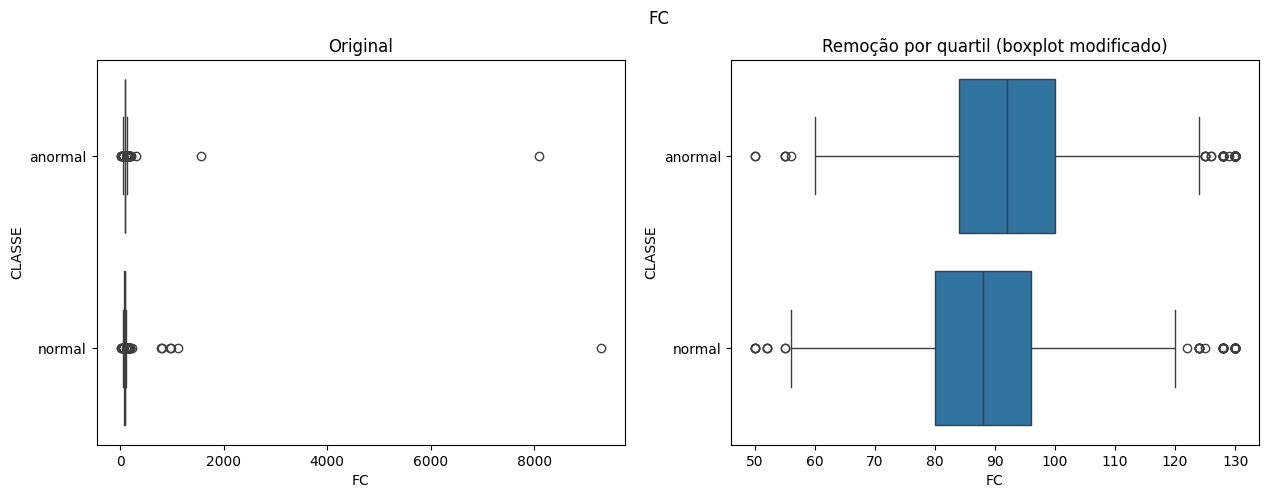

In [292]:
# IDENTIFICAR OUTLIERS SEM CONSIDERAR RELAÇÃO ENTRE ATRIBUTOS
# identificação de outliers por atributo 

# por boxplot

df_aux1 = invalidar_outliers_quartil(df_train, col_numerica)

for coluna in col_numerica:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=False, sharey=False)
    fig.suptitle(f"{coluna}")
    
    sns.boxplot(df_train, x=coluna, y='CLASSE', ax=axes[0])
    axes[0].set_title(f"Original")

    sns.boxplot(df_aux1, x=coluna, y='CLASSE', ax=axes[1])
    axes[1].set_title(f"Remoção por quartil (boxplot modificado)")
    plt.show()

df_train = df_aux1


In [293]:
# EXCLUIR REGISTROS COM MENOS DE 50% DOS VALORES PREENCHIDOS 

analise_registro_incompleto(df_train, 0.5)
df_train = remover_registros_incompletos(df_train, 0.5).reset_index(drop=True)

print("Conjunto de treino sem registros com baixa taxa de preenchimento: ", df_train.shape)

display(df_train)


162 de 13559 (1.1947783759864297%) registros com mais de 50.0% dos atributos faltantes
Conjunto de treino sem registros com baixa taxa de preenchimento:  (13397, 21)


,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,...,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,2,3.5,50.0,14.0,2005-05-25,2005-05-19,0.02,GS,normais,NaN,...,NaN,normal,ausente,128.0,dispneia,NaN,m,6 - suspeita de cardiopatia,6 - dispnéia,anormal
1,3,0.0,0.0,NaN,2001-06-12,2005-05-08,NaN,SULA,normais,NaN,...,NaN,normal,sistólico,88.0,assintomático,NaN,m,2 - check-up,NaN,anormal
2,4,8.1,65.0,19.0,2009-10-15,2009-04-21,0.50,NaN,normais,NaN,...,NaN,normal,ausente,92.0,assintomático,NaN,m,5 - parecer cardiológico,NaN,anormal
3,6,26.0,112.0,21.0,2003-08-22,1999-05-26,4.40,GS,normais,100.0,...,normal,desdob fixo,ausente,100.0,assintomático,NaN,m,2 - check-up,NaN,anormal
4,7,40.0,151.0,18.0,2008-01-14,1995-08-14,12.89,SAME,normais,NaN,...,NaN,normal,ausente,96.0,dor precordial,NaN,m,5 - parecer cardiológico,NaN,anormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13392,17868,10.6,85.0,15.0,2006-12-28,2004-12-06,2.14,NaN,normais,90.0,...,NaN,normal,ausente,100.0,assintomático,NaN,m,5 - parecer cardiológico,5 - cirurgia,normal
13393,17869,9.5,76.0,16.0,2006-02-03,2004-12-06,1.20,NaN,normais,NaN,...,NaN,normal,ausente,92.0,assintomático,NaN,m,5 - parecer cardiológico,5 - cirurgia,normal
13394,17871,65.0,175.0,21.0,2007-08-03,1984-02-16,NaN,Medial,normais,126.0,...,NaN,normal,ausente,76.0,dor precordial,NaN,f,1 - cardiopatia já estabelecida,1 - cardiopatia congenica,normal
13395,17872,27.0,134.0,15.0,2004-10-04,2027-12-03,NaN,GS,normais,90.0,...,NaN,normal,sistólico,NaN,NaN,NaN,f,6 - suspeita de cardiopatia,6 - dor precordial,normal


In [294]:
# ANALISANDO CORRELAÇÃO

display(df_train[['IMC', 'Peso', 'Altura', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC', 'IDADE','Atendimento', 'DN']].corr())


,IMC,Peso,Altura,PA SISTOLICA,PA DIASTOLICA,FC,IDADE,Atendimento,DN
IMC,1.000000,0.598666,0.399651,0.404366,0.314749,-0.241984,0.363316,-0.001824,-0.016273
Peso,0.598666,1.000000,0.689488,0.328276,0.257973,-0.459353,0.741139,0.011150,-0.021896
Altura,0.399651,0.689488,1.000000,0.161703,0.139393,-0.336735,0.492402,0.023510,0.012239
PA SISTOLICA,0.404366,0.328276,0.161703,1.000000,0.669991,-0.168908,0.400894,0.005323,-0.015841
PA DIASTOLICA,0.314749,0.257973,0.139393,0.669991,1.000000,-0.121405,0.307151,0.001491,-0.012611
FC,-0.241984,-0.459353,-0.336735,-0.168908,-0.121405,1.000000,-0.598978,0.002726,-0.007663
IDADE,0.363316,0.741139,0.492402,0.400894,0.307151,-0.598978,1.000000,-0.005925,-0.139494
Atendimento,-0.001824,0.011150,0.023510,0.005323,0.001491,0.002726,-0.005925,1.000000,0.553847
DN,-0.016273,-0.021896,0.012239,-0.015841,-0.012611,-0.007663,-0.139494,0.553847,1.000000


In [295]:
# PEENCHIMENTO DOS VALORES FALTANTES NUMÉRICOS (inválidos, outliers)

df_imputed_knn_1 = pd.DataFrame(imputador_faltantes_knn(df_train, col_numerica, 1).transform(df_train[col_numerica]), columns=col_numerica)
df_imputed_knn_3 = pd.DataFrame(imputador_faltantes_knn(df_train, col_numerica, 3).transform(df_train[col_numerica]), columns=col_numerica)
df_imputed_knn_5 = pd.DataFrame(imputador_faltantes_knn(df_train, col_numerica, 5).transform(df_train[col_numerica]) , columns=col_numerica)
df_imputed_media = pd.DataFrame(imputador_faltantes_media(df_train, col_numerica).transform(df_train[col_numerica]), columns=col_numerica)

KeyboardInterrupt: 

In [219]:
# PEENCHIMENTO DOS VALORES FALTANTES CATEGÓRICOS (inválidos, outliers)

df_imputed_moda = pd.DataFrame(imputador_faltantes_moda(df_train, col_categorica).transform(df_train[col_categorica]), columns=col_categorica)

# df_imputed_randomForest = df_encoded
# imputador_faltantes_randomForest(df_imputed_randomForest, df_encoded.columns)

Relação de atributos e porcentagem de nulos: 


,qtd,%
IMC,3544.0,26.475422
Peso,1870.0,13.969819
Altura,0.0,0.000000
IDADE,851.0,6.357388
PA SISTOLICA,5210.0,38.921261
PA DIASTOLICA,5423.0,40.512476
FC,1141.0,8.523831


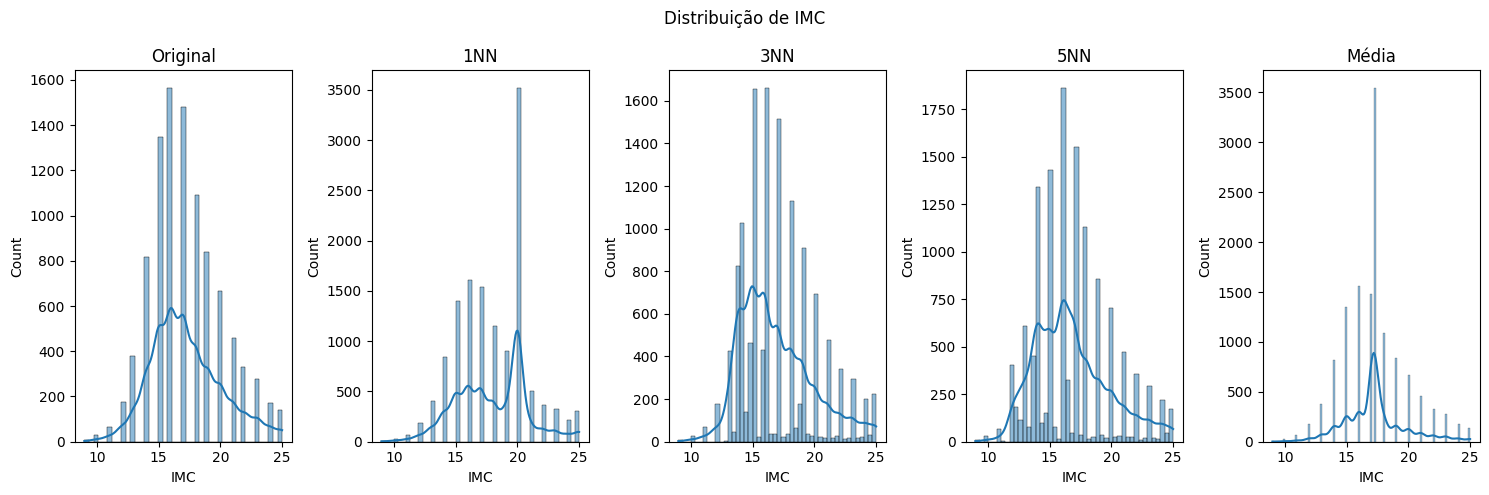

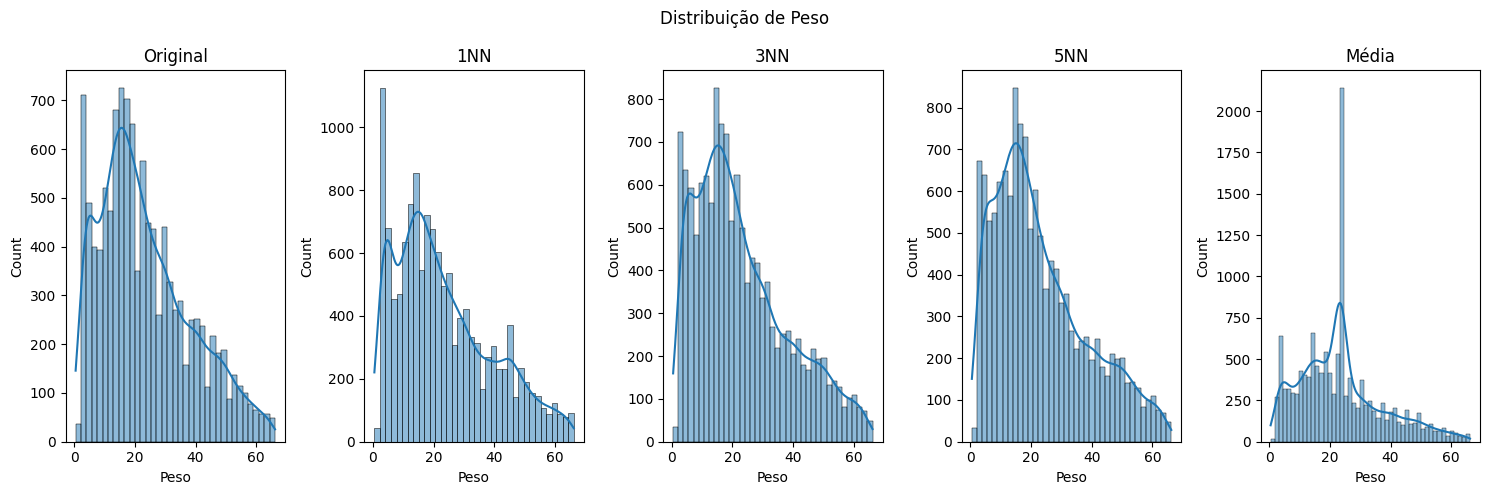

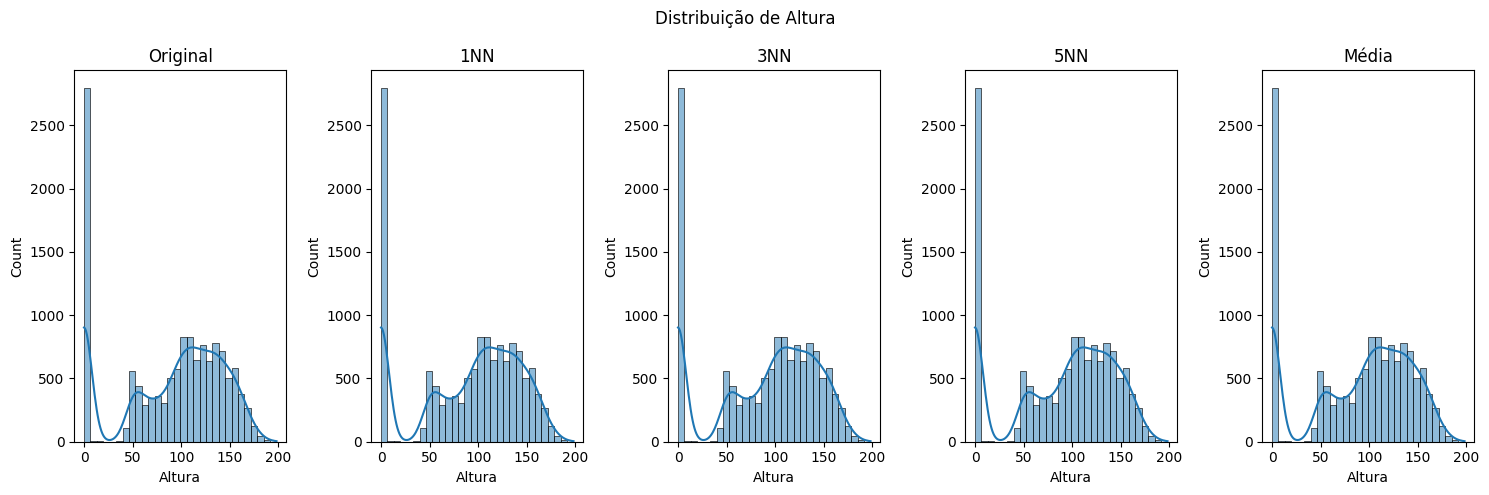

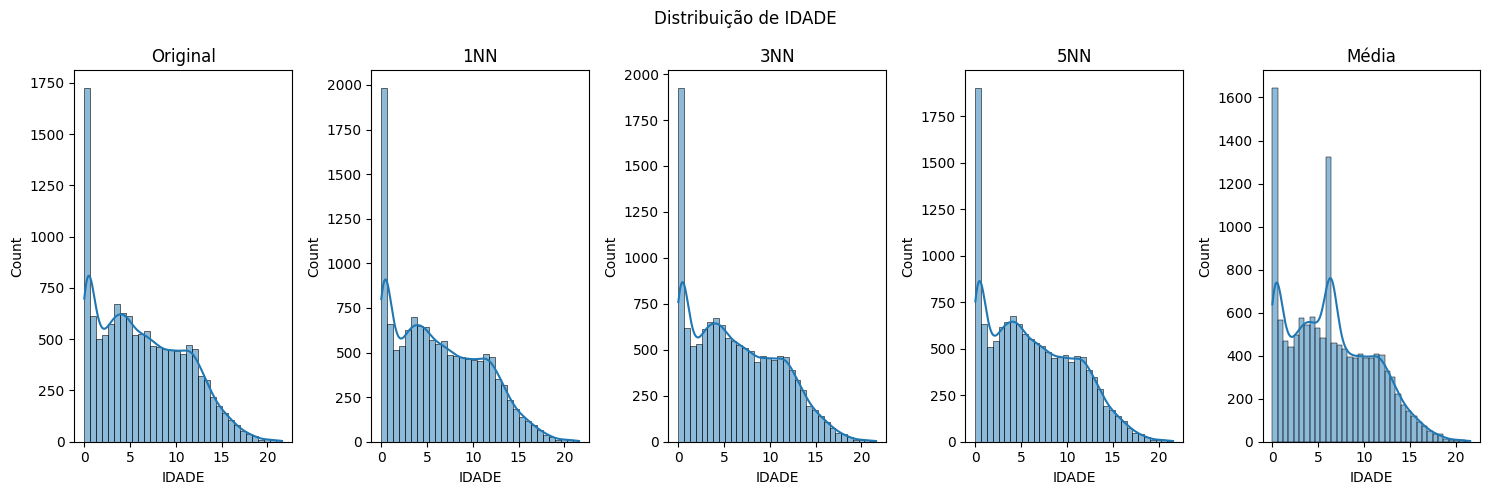

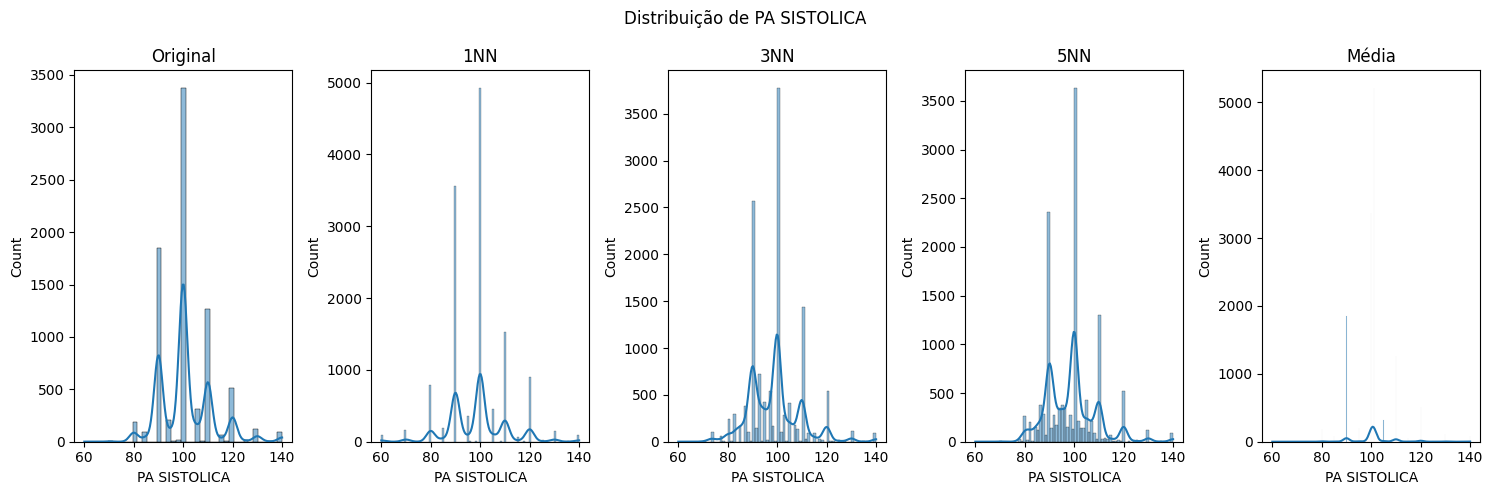

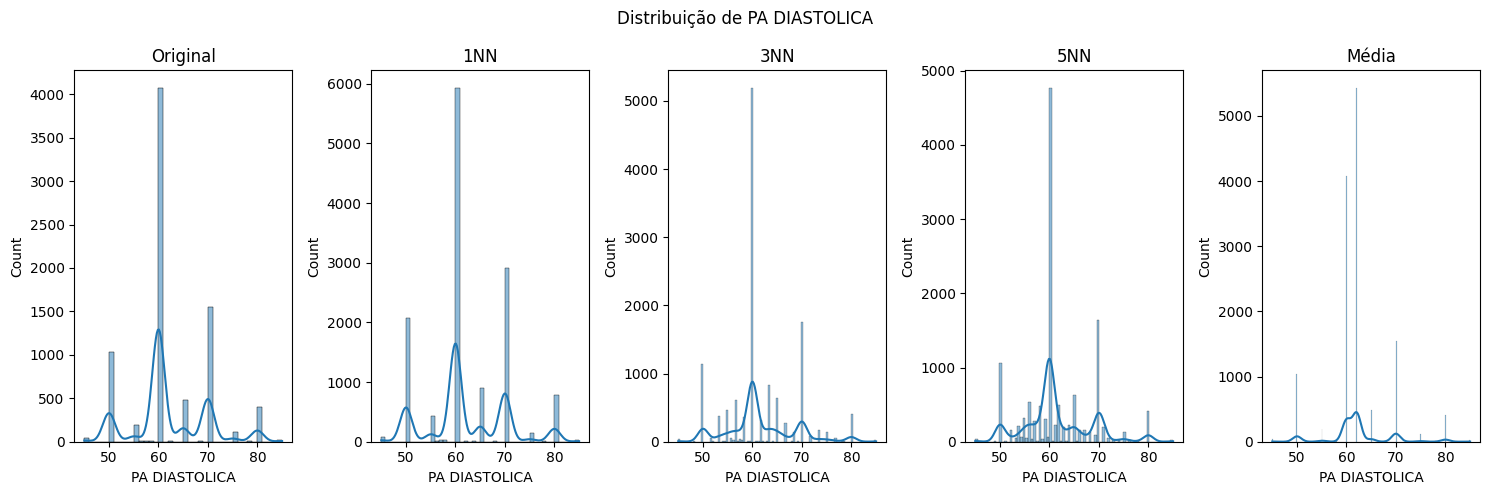

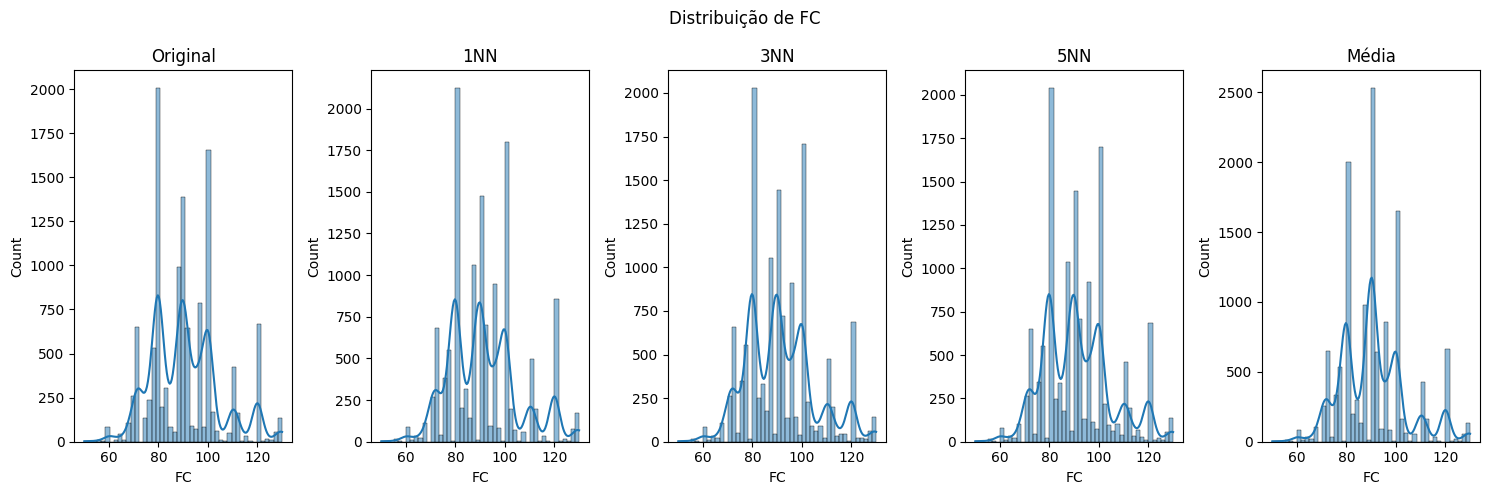

In [220]:
# COMPARANDO DISTRIBUIÇÃO ORIGINAL E DOS IMPUTADOS

analise_valores_faltantes(df_train[col_numerica])

for coluna in col_numerica:
    fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=False, sharey=False)
    fig.suptitle(f"Distribuição de {coluna}")
    # axes.set_xlabel("Valor")

    sns.histplot(df_train[coluna], ax=axes[0], kde=True)
    axes[0].set_title(f"Original")

    # sns.histplot(df_imputed_knn_1[coluna], ax=axes[1], kde=True)
    # axes[1].set_title(f"1NN")
    
    sns.histplot(df_imputed_knn_3[coluna], ax=axes[2], kde=True)
    axes[2].set_title(f"3NN")
    
    sns.histplot(df_imputed_knn_5[coluna], ax=axes[3], kde=True)
    axes[3].set_title(f"5NN")
    
    sns.histplot(df_imputed_media[coluna], ax=axes[4], kde=True)
    axes[4].set_title(f"Média")

    plt.tight_layout()    
    plt.show()

Relação de atributos e porcentagem de nulos: 


,qtd,%
PULSOS,30.0,0.224115
PPA,7722.0,57.687136
B2,16.0,0.119528
SOPRO,7.0,0.052293
HDA 1,3318.0,24.787091
SEXO,439.0,3.279546
MOTIVO1,137.0,1.023457
MOTIVO2,3084.0,23.038996


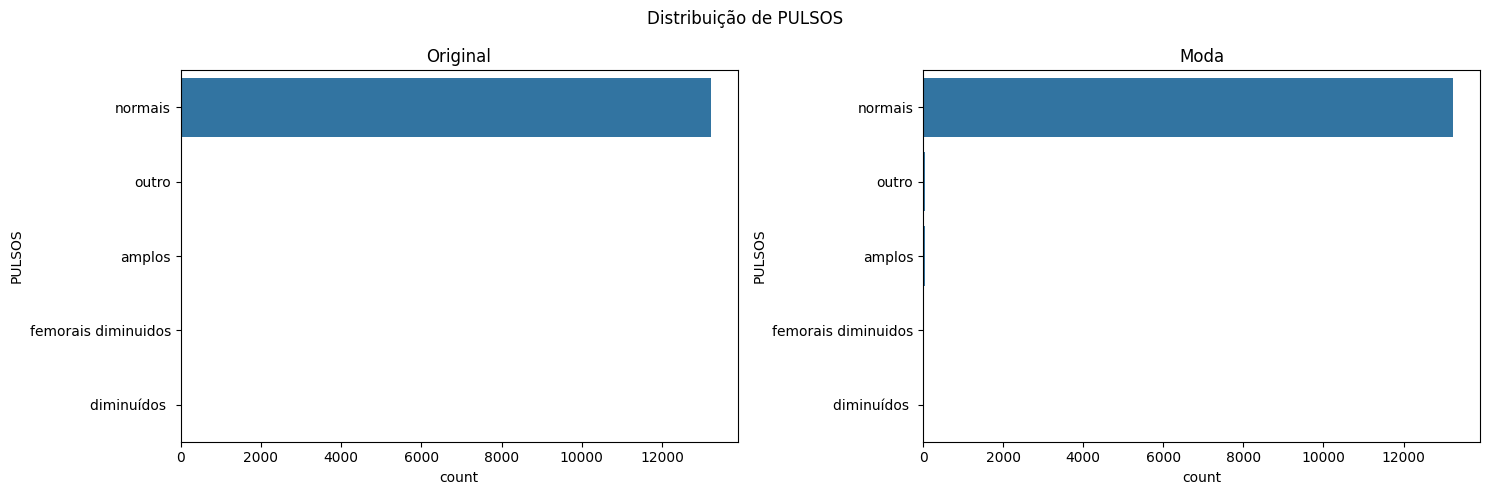

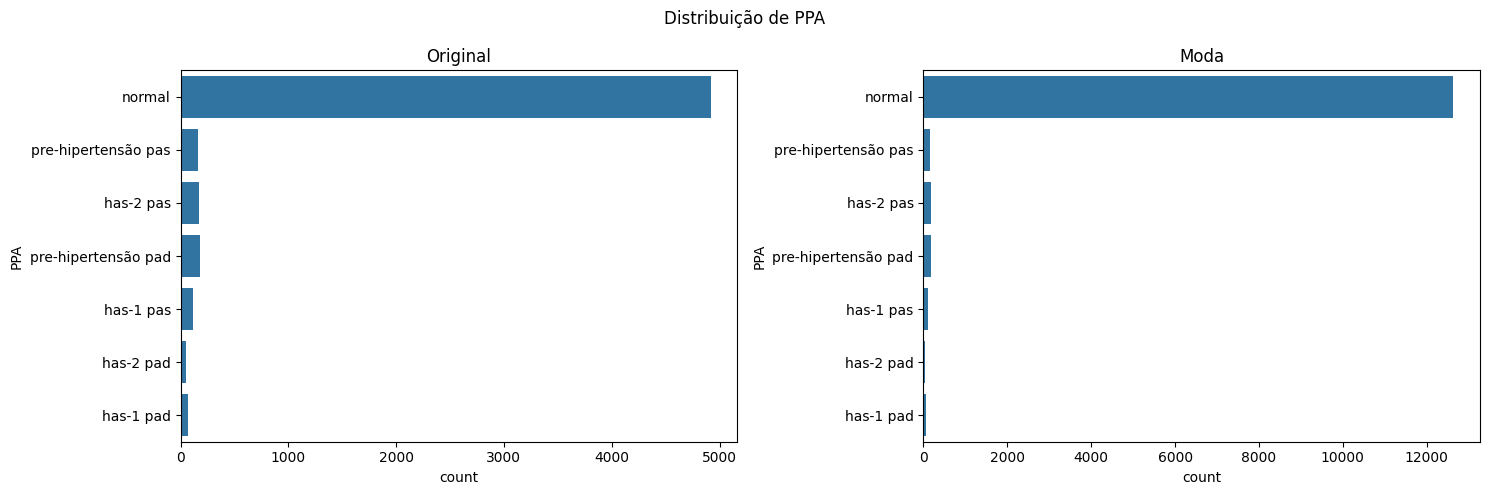

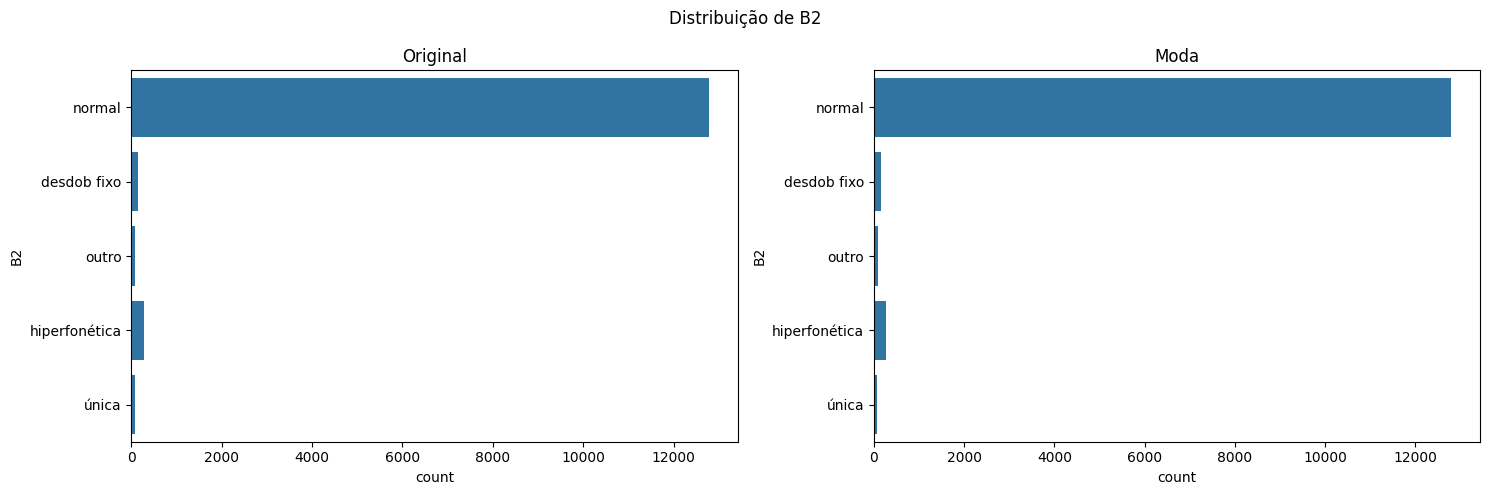

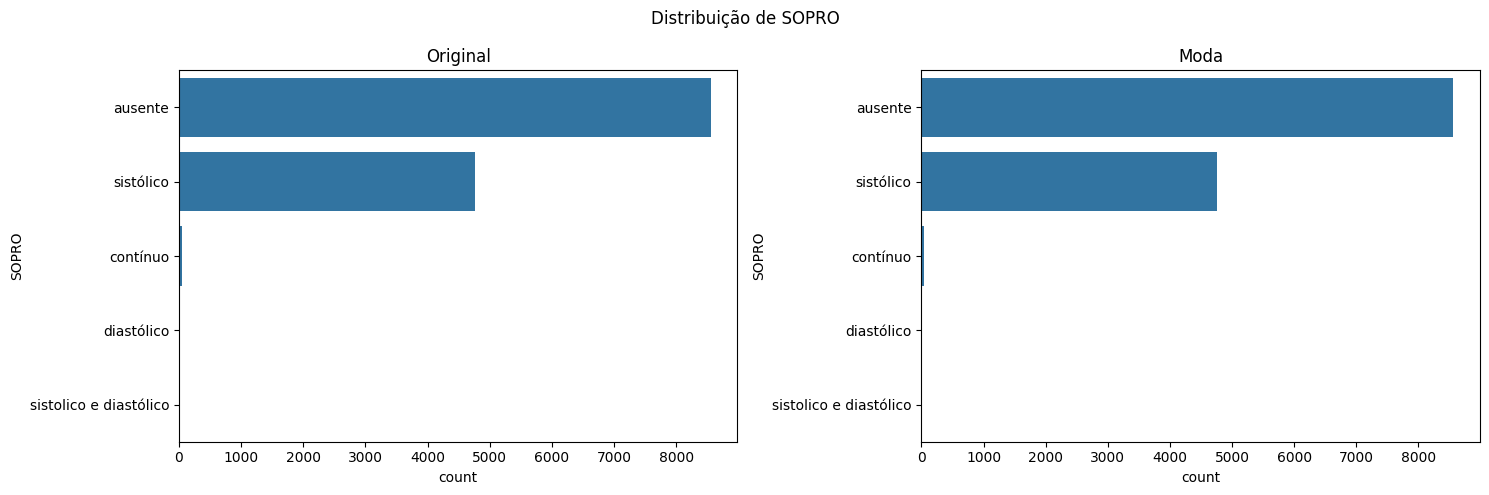

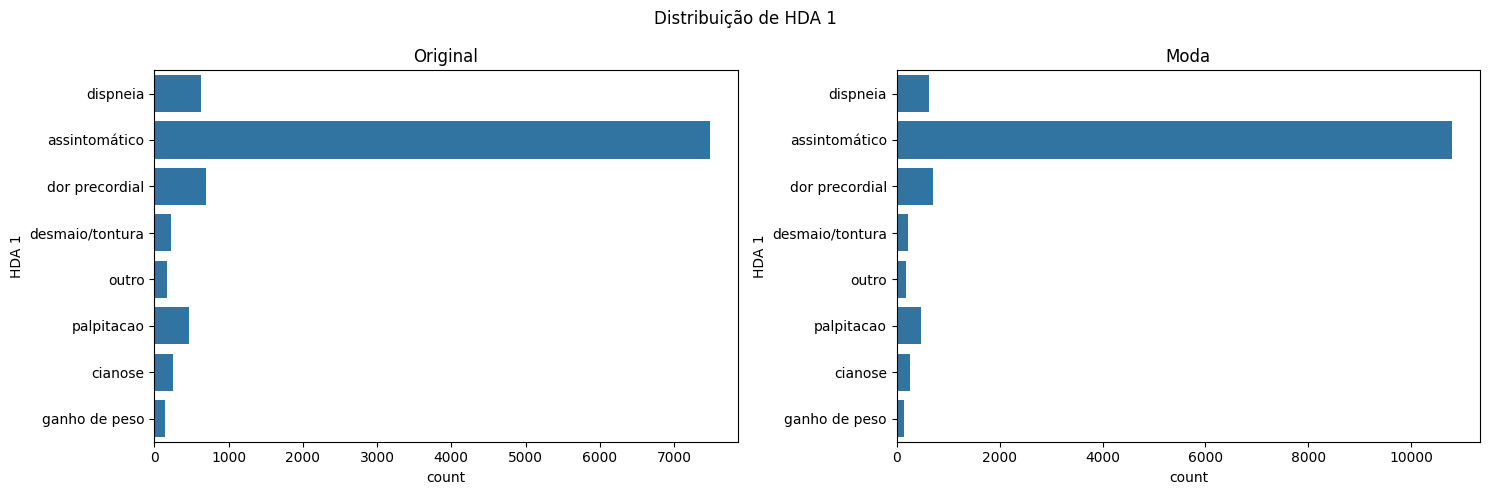

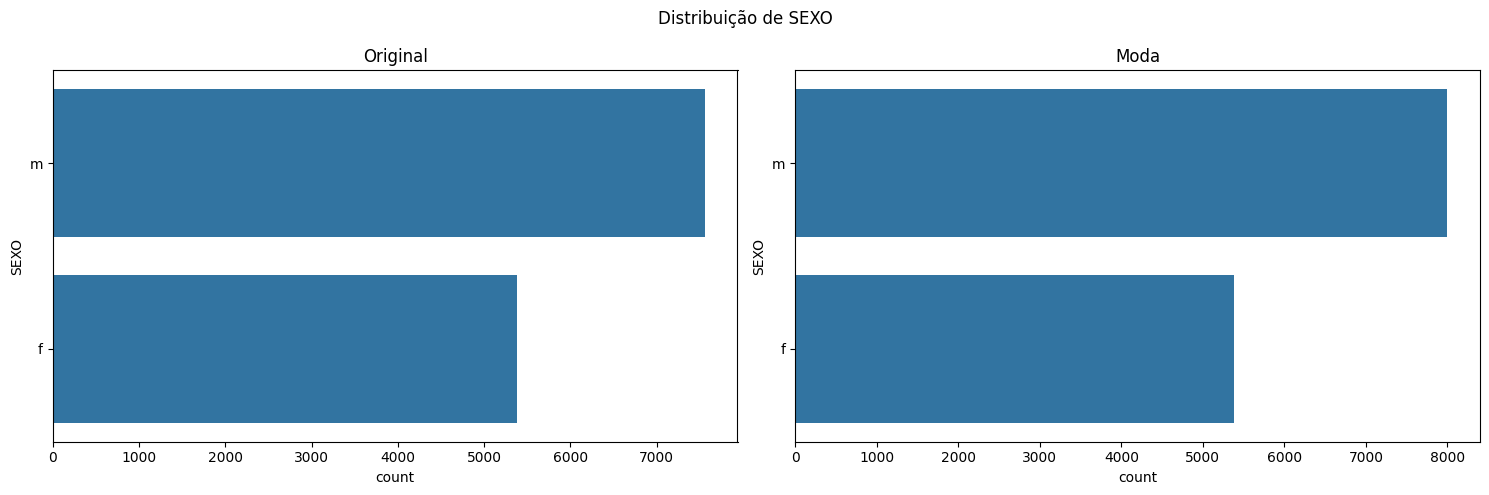

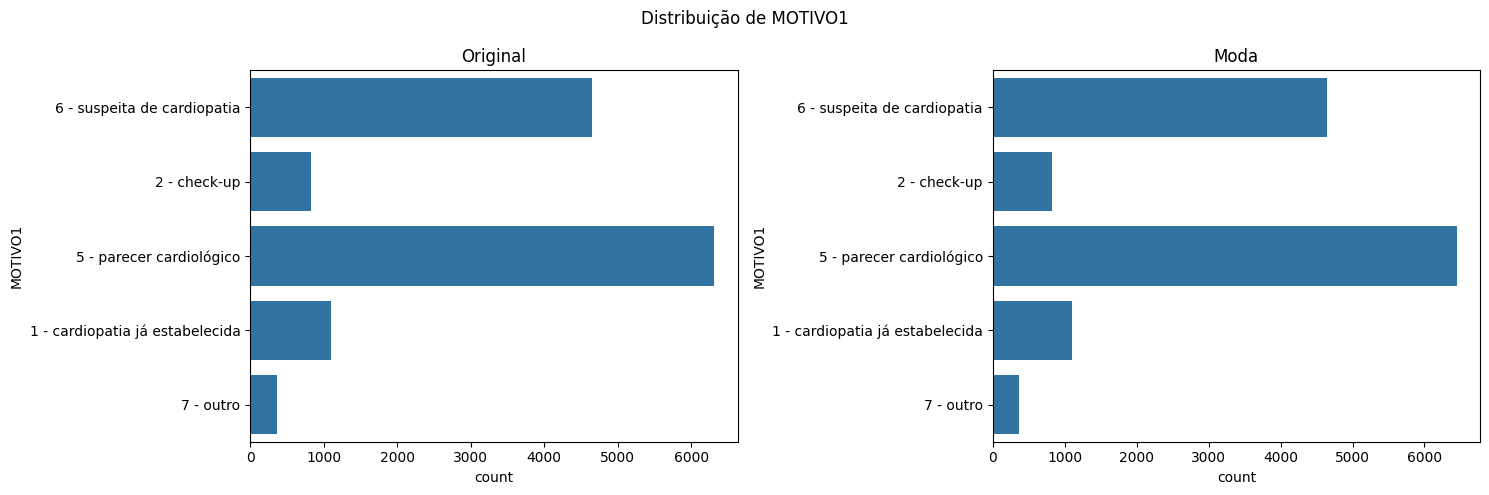

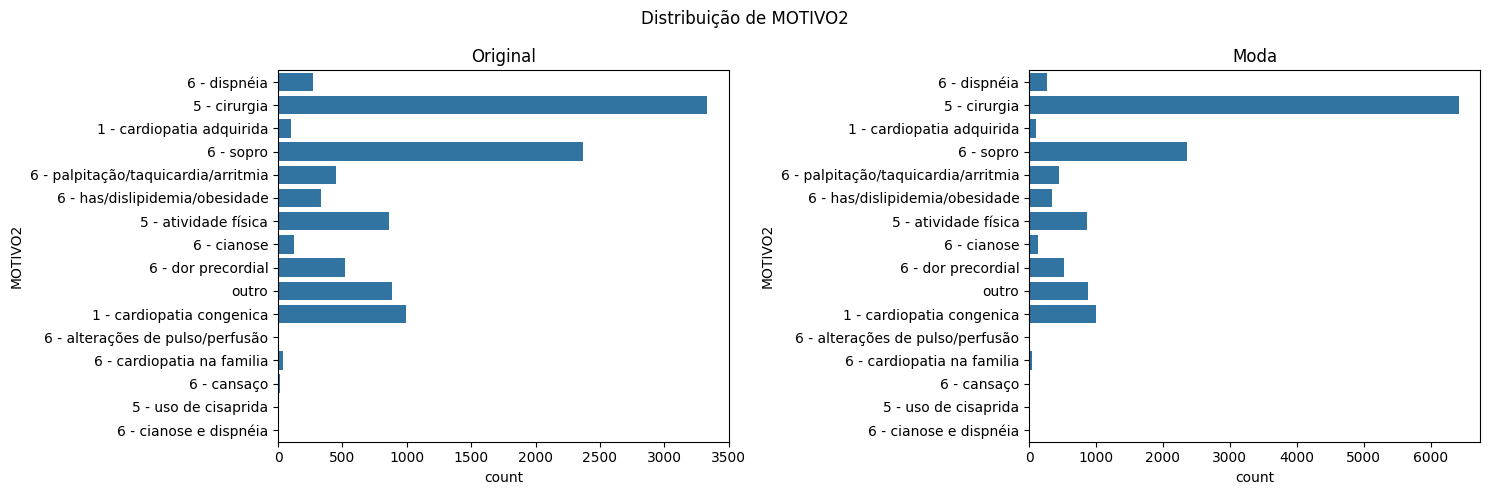

In [ ]:
# COMPARANDO DISTRIBUIÇÃO ORIGINAL E DOS IMPUTADOS

analise_valores_faltantes(df_train[col_categorica])

for coluna in col_categorica:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=False, sharey=False)
    fig.suptitle(f"Distribuição de {coluna}")
    # axes.set_xlabel("Valor")

    sns.countplot(df_train[coluna], ax=axes[0])
    axes[0].set_title(f"Original")

    sns.countplot(df_imputed_moda[coluna], ax=axes[1])
    axes[1].set_title(f"Moda")

    plt.tight_layout()    
    plt.show()

In [ ]:
# ADOÇÃO DOS MELHORES IMPUTERS

df_train[col_numerica] = df_imputed_knn_5
df_train[col_categorica] = df_imputed_moda

analise_valores_faltantes(df_train)

Relação de atributos e porcentagem de nulos: 


,qtd,%
Id,0.0,0.000000
Peso,0.0,0.000000
Altura,0.0,0.000000
IMC,0.0,0.000000
Atendimento,403.0,3.010608
DN,705.0,5.266697
IDADE,0.0,0.000000
Convenio,3541.0,26.453011
PULSOS,0.0,0.000000
PA SISTOLICA,0.0,0.000000


In [ ]:
# EXLUIR DUPLICATAS (mesmos valores de atributos e mesma classifiação)

df_train = remover_duplicatas(df_train).reset_index(drop=True)
print("Conjunto de treino sem duplicatas: ", df_train.shape)

Conjunto de treino sem duplicatas:  (13288, 21)


In [224]:
# EXCLUIR INCONSISTÊNCIAS (mesmos valores de atributos e classificação diferente)

df_train = remover_inconsistencia(df_train).reset_index(drop=True)
print("Registros de treino sem inconsistências: ", df_train.shape)

Registros de treino sem inconsistências:  (13288, 21)


In [225]:
# GERAR INFORMAÇÃO SOBRE OS ATRIBUTOS CATEGÓRICOS

# for coluna in col_categorica:
#     display(df_train[coluna].value_counts(dropna=False))

PULSOS
normais                13153
amplos                    46
outro                     38
femorais diminuidos       36
diminuídos                15
Name: count, dtype: int64

PPA
normal                 12545
pre-hipertensão pad      182
has-2 pas                168
pre-hipertensão pas      158
has-1 pas                118
has-1 pad                 69
has-2 pad                 48
Name: count, dtype: int64

B2
normal           12707
hiperfonética      271
desdob fixo        156
outro               83
única               71
Name: count, dtype: int64

SOPRO
ausente                   8523
sistólico                 4712
contínuo                    42
diastólico                   8
sistolico e diastólico       3
Name: count, dtype: int64

HDA 1
assintomático      10710
dor precordial       696
dispneia             626
palpitacao           473
cianose              251
desmaio/tontura      223
outro                170
ganho de peso        139
Name: count, dtype: int64

SEXO
m    7937
f    5351
Name: count, dtype: int64

MOTIVO1
5 - parecer cardiológico           6411
6 - suspeita de cardiopatia        4603
1 - cardiopatia já estabelecida    1092
2 - check-up                        821
7 - outro                           361
Name: count, dtype: int64

MOTIVO2
5 - cirurgia                           6391
6 - sopro                              2343
1 - cardiopatia congenica               979
outro                                   879
5 - atividade física                    848
6 - dor precordial                      514
6 - palpitação/taquicardia/arritmia     446
6 - has/dislipidemia/obesidade          333
6 - dispnéia                            265
6 - cianose                             124
1 - cardiopatia adquirida               100
6 - cardiopatia na familia               41
6 - cansaço                              13
5 - uso de cisaprida                      5
6 - alterações de pulso/perfusão          4
6 - cianose e dispnéia                    3
Name: count, dtype: int64

In [ ]:
# GERA ESTATÍSTICA DO CONJUNTO PÓS REMOÇÃO DE OUTLIERS

df_detalhes = df_train.describe(include='all')
display(df_detalhes)

,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,...,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
count,13288.000000,13288.000000,13288.000000,13288.000000,12887,12590,13288.000000,9767,13288,13288.000000,...,13288,13288,13288,13288.000000,13288,534,13288,13288,13288,13288
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400,5,NaN,...,7,5,5,NaN,8,8,2,5,16,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GS,normais,NaN,...,normal,normal,ausente,NaN,assintomático,Palpitacao,m,5 - parecer cardiológico,5 - cirurgia,normal
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2108,13153,NaN,...,12545,12707,8523,NaN,10710,126,7937,6411,6391,7942
mean,8938.844145,23.179247,88.536273,16.775527,2007-03-05 13:59:03.571040512,2001-02-08 04:16:05.337569536,6.322690,NaN,NaN,98.658820,...,NaN,NaN,NaN,91.158730,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,0.500000,0.000000,9.000000,1990-01-03 00:00:00,1969-07-14 00:00:00,0.010000,NaN,NaN,60.000000,...,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,4446.750000,11.600000,51.000000,14.400000,2005-05-23 00:00:00,1997-06-08 00:00:00,2.320000,NaN,NaN,90.000000,...,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,8920.500000,19.500000,102.000000,16.200000,2007-06-21 00:00:00,2001-06-08 00:00:00,5.680000,NaN,NaN,100.000000,...,NaN,NaN,NaN,90.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,13414.250000,32.000000,132.000000,18.800000,2009-01-19 12:00:00,2005-02-07 00:00:00,9.970000,NaN,NaN,103.000000,...,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,17873.000000,66.200000,198.000000,25.000000,2066-08-22 00:00:00,2068-07-06 00:00:00,21.590000,NaN,NaN,140.000000,...,NaN,NaN,NaN,130.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
# IDENTIFICAR OUTLIERS CONSIDERANDO TODOS OS ATRIBUTOS
# identificação de outliers por registro 
# uma estratégia é a aplicação do PCA para redução de dimensionalidade 

In [ ]:
# TRANSFORMÇÃO SIMBÓLICO-NUMÉRICO

col_nominal = ["PULSOS", "B2", "HDA 1", "SEXO", "MOTIVO1", "MOTIVO2"]
col_ordinal = ["PPA", "SOPRO"]


codificador_hotOne = codificador_nominais(df_train, col_nominal)
df_encoded_nominal = pd.DataFrame(codificador_hotOne.transform(df_train[col_nominal]), columns=codificador_hotOne.get_feature_names_out(col_nominal))

display(df_encoded_nominal)


categoria_ppa = ['normal', 'pre-hipertensão pas', 'pre-hipertensão pad', 'has-1 pas', 'has-1 pad', 'has-2 pas', 'has-2 pad']
categoria_sopro = ['ausente', 'sistólico', 'diastólico', 'contínuo', 'sistolico e diastólico']
col_ordinal_categorias = [categoria_ppa, categoria_sopro]

codificador_ordinal = codificador_ordinais(df_train, col_ordinal, col_ordinal_categorias) 
df_encoded_ordinal = pd.DataFrame(codificador_ordinal.transform(df_train[col_ordinal]), columns=col_ordinal)

display(df_encoded_ordinal)


,PULSOS_amplos,PULSOS_diminuídos,PULSOS_femorais diminuidos,PULSOS_normais,PULSOS_outro,B2_desdob fixo,B2_hiperfonética,B2_normal,B2_outro,B2_única,...,MOTIVO2_6 - cansaço,MOTIVO2_6 - cardiopatia na familia,MOTIVO2_6 - cianose,MOTIVO2_6 - cianose e dispnéia,MOTIVO2_6 - dispnéia,MOTIVO2_6 - dor precordial,MOTIVO2_6 - has/dislipidemia/obesidade,MOTIVO2_6 - palpitação/taquicardia/arritmia,MOTIVO2_6 - sopro,MOTIVO2_outro
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13283,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13284,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13285,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13286,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


,PPA,SOPRO
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
13283,0.0,0.0
13284,0.0,0.0
13285,0.0,0.0
13286,0.0,1.0


In [229]:

# A ordem será alterada, para mantermos a classe no final ela vai ser separada temporariamente
classes = df_train.iloc[:, -1]
df_train = df_train.drop(columns=['CLASSE', col_nominal])

print(df_train.columns)

# É adicionada novamente a coluna da classe
df_train = pd.concat([df_train, classes], axis=1)

df_train[col_ordinal] = df_encoded_ordinal


In [ ]:
# NORMALIZAR ATRIBUTOS

df_train = normalizar(df_train, True)
display(df_train)


,PULSOS_amplos,PULSOS_diminuídos,PULSOS_femorais diminuidos,PULSOS_normais,PULSOS_outro,B2_desdob fixo,B2_hiperfonética,B2_normal,B2_outro,B2_única,...,MOTIVO2_6 - cianose,MOTIVO2_6 - cianose e dispnéia,MOTIVO2_6 - dispnéia,MOTIVO2_6 - dor precordial,MOTIVO2_6 - has/dislipidemia/obesidade,MOTIVO2_6 - palpitação/taquicardia/arritmia,MOTIVO2_6 - sopro,MOTIVO2_outro,PPA,SOPRO
0,0.0,-0.033617,-0.052121,0.101311,-0.053553,-0.108993,-0.144288,0.213829,-0.079281,-0.073293,...,-0.097055,-0.015027,7.010235,-0.200594,-0.160326,-0.186359,-0.462677,-0.26615,-0.213422,0.0
1,0.0,-0.033617,-0.052121,0.101311,-0.053553,-0.108993,-0.144288,0.213829,-0.079281,-0.073293,...,-0.097055,-0.015027,-0.142649,-0.200594,-0.160326,-0.186359,-0.462677,-0.26615,-0.213422,1.0
2,0.0,-0.033617,-0.052121,0.101311,-0.053553,-0.108993,-0.144288,0.213829,-0.079281,-0.073293,...,-0.097055,-0.015027,-0.142649,-0.200594,-0.160326,-0.186359,-0.462677,-0.26615,-0.213422,0.0
3,0.0,-0.033617,-0.052121,0.101311,-0.053553,9.174938,-0.144288,-4.676635,-0.079281,-0.073293,...,-0.097055,-0.015027,-0.142649,-0.200594,-0.160326,-0.186359,-0.462677,-0.26615,-0.213422,0.0
4,0.0,-0.033617,-0.052121,0.101311,-0.053553,-0.108993,-0.144288,0.213829,-0.079281,-0.073293,...,-0.097055,-0.015027,-0.142649,-0.200594,-0.160326,-0.186359,-0.462677,-0.26615,-0.213422,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13283,0.0,-0.033617,-0.052121,0.101311,-0.053553,-0.108993,-0.144288,0.213829,-0.079281,-0.073293,...,-0.097055,-0.015027,-0.142649,-0.200594,-0.160326,-0.186359,-0.462677,-0.26615,-0.213422,0.0
13284,0.0,-0.033617,-0.052121,0.101311,-0.053553,-0.108993,-0.144288,0.213829,-0.079281,-0.073293,...,-0.097055,-0.015027,-0.142649,-0.200594,-0.160326,-0.186359,-0.462677,-0.26615,-0.213422,0.0
13285,0.0,-0.033617,-0.052121,0.101311,-0.053553,-0.108993,-0.144288,0.213829,-0.079281,-0.073293,...,-0.097055,-0.015027,-0.142649,-0.200594,-0.160326,-0.186359,-0.462677,-0.26615,-0.213422,0.0
13286,0.0,-0.033617,-0.052121,0.101311,-0.053553,-0.108993,-0.144288,0.213829,-0.079281,-0.073293,...,-0.097055,-0.015027,-0.142649,4.985192,-0.160326,-0.186359,-0.462677,-0.26615,-0.213422,1.0


---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

In [231]:
# Importar dados de id dos testes
df_test_id = pd.read_csv('data/test.csv', sep=',', index_col=None)

# Associar IDs dos testes a base de dados
df_test =  pd.merge(df_dataset, df_test_id, on='Id')

# Retirar colunas defasadas
df_test = df_test.drop(columns=['Peso', 'Altura', 'Atendimento', 'DN', 'Convenio', 'HDA2'], axis=1)


In [232]:

# IDENTIFICAR VALORES FALTANTES E INVÁLIDOS DE TESTES

# ATRIBUTOS NUMÉRICOS
    # transformando não numéricos em NaN
df_test[col_numerica] = invalidar_nao_numerico(df_test, col_numerica)
    # identificando valores fora do intervalo aceitável
df_test['IDADE'] = df_test['IDADE'].apply(lambda x: x if 0<x else np.nan)

# ATRIBUTOS CATEGÓRICOS
    # transformando para forma canônica (lower case)
df_test[col_categorica] = padronizar_string(df_test, col_categorica)
    # identificando valores inválidos e transformando em NaN
        # PPA  
valores_validos = ['normal', 'pre-hipertensão pas', 'has-2 pas', 'pre-hipertensão pad', 'has-1 pas', 'has-2 pad', 'has-1 pad']
df_test['PPA'] = df_test['PPA'].apply(lambda x: x if x in valores_validos else np.nan)
        # SEXO
valores_validos_f = ['f', 'feminino']
valores_validos_m = ['m', 'masculino']
df_test['SEXO'] = df_test['SEXO'].apply(lambda x: 'f' if x in valores_validos_f else 'm' if x in valores_validos_m else np.nan)

for coluna in col_categorica:
    display(df_test[coluna].value_counts(dropna=False))


KeyError: "['Peso', 'Altura'] not in index"

In [340]:

# PREENCHER FALTANTES 

df_test[col_numerica] = preencher_teste(df_test[col_numerica], df_detalhes.loc['mean', col_numerica].values)

df_test[col_categorica] = preencher_teste(df_test[col_categorica], df_detalhes.loc['top', col_categorica].values)


17.268901703767906
6.381051019512232
100.83315322747673
61.5007442454416
90.65268391248193
normais
normal
normal
ausente
assintomático
m
5 - parecer cardiológico
5 - cirurgia


In [341]:
# CONVERTER SIMBÓLICO-NUMÉRICO
display(df_test['PPA'])

df_test = converter_ordinais(df_test, ["PPA", "SOPRO"], [cat_ppa, cat_sopro])

df_test = converter_nominais(df_test, ["PULSOS", "B2", "HDA 1", "SEXO", "MOTIVO1", "MOTIVO2"])


0       normais
1        normal
2       normais
3       normais
4        normal
         ...   
3141    normais
3142    normais
3143    normais
3144    normais
3145    normais
Name: PPA, Length: 3146, dtype: object

ValueError: Found unknown categories ['normais'] in column 0 during fit

In [975]:
# NORMALIZAR ATRIBUTOS
df_test = normalizar(df_test, False)
display(df_test)

In [ ]:
# GUARDAR DATAFRAME EM MATRIZES

X = df_train.iloc[:, :-1].values
Y = df_train.iloc[:, -1].values

df_test_id

,Id
0,8957
1,4246
2,9089
3,10606
4,9863
...,...
3141,14053
3142,9000
3143,14643
3144,15107


In [977]:
# K-VIZINHOS MAIS PRÓXIMOS
# sensível a escala (trabalha com dados normalizados)
from sklearn.neighbors import KNeighborsClassifier as knn

vizinhos = knn(n_neighbors=5)

vizinhos.fit(X, Y)



KNeighborsClassifier()

In [978]:
# NAIVE BAYES
from sklearn.naive_bayes import

SyntaxError: invalid syntax (668894740.py, line 2)

In [118]:
# REGRESSÃO LOGIÍSTICA
# sensível a escala (trabalha com dados normalizados)


In [119]:
# REDES NEURAIS ARTIFICIAIS
# sensível a escala (trabalha com dados normalizados)


In [120]:
# MÁQUINAS DE VETORES DE SUPORTE
# sensível a escala (trabalha com dados normalizados)


---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.